In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.nn import functional as F

from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from transformers import pipeline, AutoTokenizer, AutoModel

<Axes: >

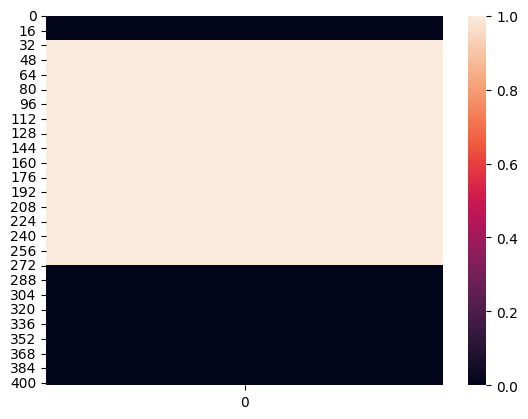

In [3]:
df = pd.read_csv('data/phones.csv')
df_test = pd.read_csv('data/laptops.csv')
sns.heatmap(np.array(df_test['label']==1).reshape(-1, 1))

In [10]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
m = model.fit(df.text, df.label)
pred = model.predict(df_test.text)

0.8982630272952854

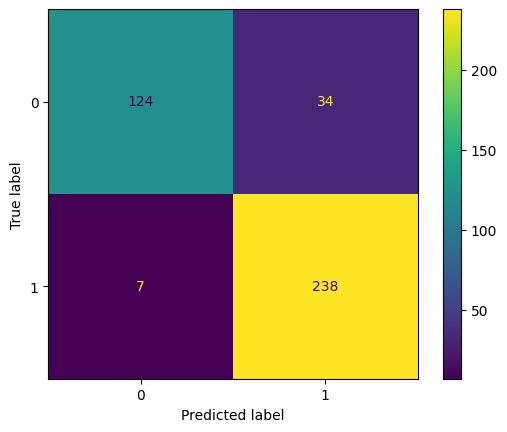

In [21]:
ConfusionMatrixDisplay(confusion_matrix(df_test.label, pred)).plot()
accuracy_score(df_test.label, pred)